In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import json
% matplotlib inline

In [ ]:
with open("stateandregionboundaries.geojson") as json_data:
    d = json.load(json_data)

In [ ]:
for index in range(len(d['features'])-1):
    print d['features'][index]['properties']['st']

In [ ]:
#Pcode = [d['features'][index]['properties']['st_pcode'] for index in range(len(d['features'])-1)]
#coordinates = [d['features'][i]['geometry']['coordinates'] for index in range(len(d['features'])-1)]

In [ ]:
df = pd.read_csv('Household_living_conditions.csv')

In [ ]:
df.head()

In [ ]:
import copy
import numpy as np
import pandas as pd
import geopandas as gpd

region_boundaries = gpd.read_file("stateandregionboundaries.geojson")

region = pd.DataFrame(region_boundaries[['cartodb_id', 'geometry', 'st', 'st_pcode']].values)
region.columns = ['cartodb_id', 'geometry', 'st', 'st_pcode']

region_data = pd.read_csv('Household_living_conditions.csv')

df_all = pd.merge(left=region_boundaries, right=region_data, left_on='st_pcode', right_on='Pcode')
# df_all.to_csv('region_data.csv')

In [ ]:
df_all = df_all.drop('Pcode', axis =1)

In [ ]:
df_all.to_csv('regional_data.csv', index = False)

In [ ]:
df_all.head()

In [ ]:
regional = pd.read_csv("regional_data.csv")
regional.head()

In [268]:
df = pd.read_csv('Household_living_conditions.csv')

In [472]:
df.head()[:15]

,Region,access_to_credit_agriculture Poor,access_to_credit_agriculture Non_Poor,access_to_credit_Non-Agricultural_businesses Poor,access_to_credit_Non-Agricultural_businesses Non_Poor,access_to_credit_Non-Agricultural_businesses Urban,access_to_credit_Non-Agricultural_businesses Rural,access_to_electricity Poor,access_to_electricity Non_Poor,access_to_electricity Urban,...,Education Level of HouseHold Head post_secondary_school,Female Headed HouseHolds Poor,Female Headed HouseHolds Non_Poor,Landless Rate In Agriculture Poor,Landless Rate In Agriculture Non_Poor,Poverty Transition Matrix Chronic_Poor,Poverty Transition Matrix Non_Poor,Poverty Transition Matrix Descents,Poverty Transition Matrix Escapes,Pcode
0,ayeyarwaddy,48.5,55.4,19.2,15.6,11.3,18.3,14.5,35.4,80.1,...,3.4,16.4,17.1,50.4,24.2,11.5,60.9,14.3,13.3,MMR017
1,bago,44.5,38.4,10.2,15.1,15.7,13.8,17.7,33.9,77.0,...,2.6,19.9,21.8,69.6,35.4,5.6,66.8,9.7,17.9,MMR111
2,chin,8.2,0.0,24.0,9.3,17.4,16.2,50.2,51.0,79.0,...,3.7,13.6,16.4,8.4,7.0,51.5,10.5,17.4,20.6,MMR004
3,kachin,28.5,24.4,9.2,8.7,7.2,10.0,28.2,62.0,77.4,...,4.1,27.9,24.0,21.4,15.0,12.5,55.1,8.9,23.6,MMR001
4,kayah,52.4,43.6,59.4,9.4,12.8,8.2,43.6,79.6,100.0,...,3.6,23.2,17.8,24.5,10.8,3.7,71.7,4.9,19.7,MMR002


In [334]:
df1 = df[['access_to_credit_Non-Agricultural_businesses Rural',
          'access_to_credit_Non-Agricultural_businesses Urban',
          ' access_to_credit_agriculture Poor',
          'access_to_credit_agriculture Non_Poor',
          ' access_to_credit_Non-Agricultural_businesses Poor',
          'access_to_credit_Non-Agricultural_businesses Non_Poor']]

In [335]:
df1.head()

,access_to_credit_Non-Agricultural_businesses Rural,access_to_credit_Non-Agricultural_businesses Urban,access_to_credit_agriculture Poor,access_to_credit_agriculture Non_Poor,access_to_credit_Non-Agricultural_businesses Poor,access_to_credit_Non-Agricultural_businesses Non_Poor
0,18.3,11.3,48.5,55.4,19.2,15.6
1,13.8,15.7,44.5,38.4,10.2,15.1
2,16.2,17.4,8.2,0.0,24.0,9.3
3,10.0,7.2,28.5,24.4,9.2,8.7
4,8.2,12.8,52.4,43.6,59.4,9.4


In [336]:
# from sklearn import decomposition

# pca = decomposition.PCA(n_components=3)
# pca.fit(credit)
# credit = pca.transform(credit)

In [337]:
# credit

In [372]:
#Load dependencies
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from matplotlib import*
import matplotlib.pyplot as plt
from matplotlib.cm import register_cmap
from scipy import stats
#from wpca import PCA
from sklearn.decomposition import PCA as sklearnPCA

X_std = StandardScaler().fit_transform(df1)

In [374]:
#X_std = df.std()

In [381]:
mean_vec = np.mean(X_std, axis=0)
cov_mat = np.cov(df1)
print('Covariance matrix \n%s' %cov_mat)

Covariance matrix 
[[  355.035        256.895       -121.979        168.466        265.394
    -38.061        232.595         13.114         90.584        220.915
     96.388        -42.916        625.446        248.096     ]
 [  256.895        212.715        -95.335        132.372        160.774
    -64.293        179.323          3.524         60.544        169.257
     69.824        -24.74         478.3          182.044     ]
 [ -121.979        -95.335         70.98566667   -55.75533333
     -5.46733333    52.57233333   -69.177         27.94466667
    -21.80133333   -93.07433333   -40.75333333     1.97333333
   -229.80266667   -78.012     ]
 [  168.466        132.372        -55.75533333    85.82266667
    126.91866667   -22.89666667   119.428          8.96066667
     42.15466667   104.51266667    43.75066667   -18.74466667
    302.19133333   120.94      ]
 [  265.394        160.774         -5.46733333   126.91866667
    548.18266667   107.90733333   203.286        133.27866667
    1

In [382]:
cov_mat.shape

(14, 14)

In [383]:
print('NumPy covariance matrix: \n%s' %np.cov(X_std.T))

NumPy covariance matrix: 
[[ 1.07692308  0.40039934 -0.36157771 -0.42353622  0.28861594  0.84479117]
 [ 0.40039934  1.07692308 -0.05545583 -0.20128533  0.32599091  0.63882152]
 [-0.36157771 -0.05545583  1.07692308  1.0219668   0.10134191 -0.03544794]
 [-0.42353622 -0.20128533  1.0219668   1.07692308 -0.10653533 -0.08946338]
 [ 0.28861594  0.32599091  0.10134191 -0.10653533  1.07692308  0.14718756]
 [ 0.84479117  0.63882152 -0.03544794 -0.08946338  0.14718756  1.07692308]]


In [391]:
#Perform eigendecomposition on covariance matrix
#cov_mat = np.cov(X_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat.T)
print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[  3.70715747e-01+0.j          -2.86462115e-02+0.j           3.36003049e-01+0.j
   -1.56618276e-01+0.j          -1.45875952e-01+0.j
    1.01307895e-01-0.18200809j   1.01307895e-01+0.18200809j
    4.35180295e-02+0.j          -1.10483088e-01+0.j           9.86921617e-03+0.j
    3.95535342e-02+0.j           7.28464566e-02-0.04170429j
    7.28464566e-02+0.04170429j   8.11715819e-02+0.j        ]
 [  2.77862820e-01+0.j          -1.22924493e-01+0.j          -2.02637771e-01+0.j
    4.78803188e-01+0.j           9.72720089e-02+0.j
    1.81516598e-01+0.31459044j   1.81516598e-01-0.31459044j
    1.05030285e-01+0.j           2.25803165e-01+0.j          -4.01667137e-02+0.j
   -1.64939112e-02+0.j          -5.44247288e-02-0.05513622j
   -5.44247288e-02+0.05513622j  -3.27266933e-03+0.j        ]
 [ -1.23106669e-01+0.j           2.20126049e-01+0.j          -1.52867125e-01+0.j
    2.74682019e-01+0.j          -7.94280773e-01+0.j
   -1.74899281e-01-0.0635929j   -1.74899281e-01+0.0635929j
   -

In [392]:
eig_vals.shape

(14,)

In [393]:
df['Region']

0     ayeyarwaddy
1            bago
2            chin
3          kachin
4           kayah
5           kayin
6          magway
7             mon
8         rakhine
9         sagaing
10           shan
11    tanintharyi
12         yangon
13       mandalay
Name: Region, dtype: object

In [394]:
names = [[float(i),j] for i,j in zip(eig_vals,df['Region'])]

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: ComplexWarning: Casting complex values to real discards the imaginary part
  if __name__ == '__main__':


In [395]:
names_sorted = sorted( names, key =lambda x : x[0],reverse=True)
for name , n  in zip(names_sorted,df['Region']):
    print name[0] , name[1]

2533.07773357 ayeyarwaddy
513.344058125 bago
49.3473875312 chin
31.8256839363 kachin
6.60580350872 kayah
4.8143879146e-14 rakhine
3.9101948761e-14 kayin
3.9101948761e-14 magway
4.10569520924e-15 shan
-3.78095088323e-15 tanintharyi
-3.78095088323e-15 yangon
-8.39889232953e-15 mandalay
-2.54003771588e-14 sagaing
-6.45136171234e-14 mon


In [371]:
pca = sklearnPCA(n_components=2)
pca.fit_transform(df1)
print pca.explained_variance_ratio_ 

[ 0.68862619  0.2427183 ]


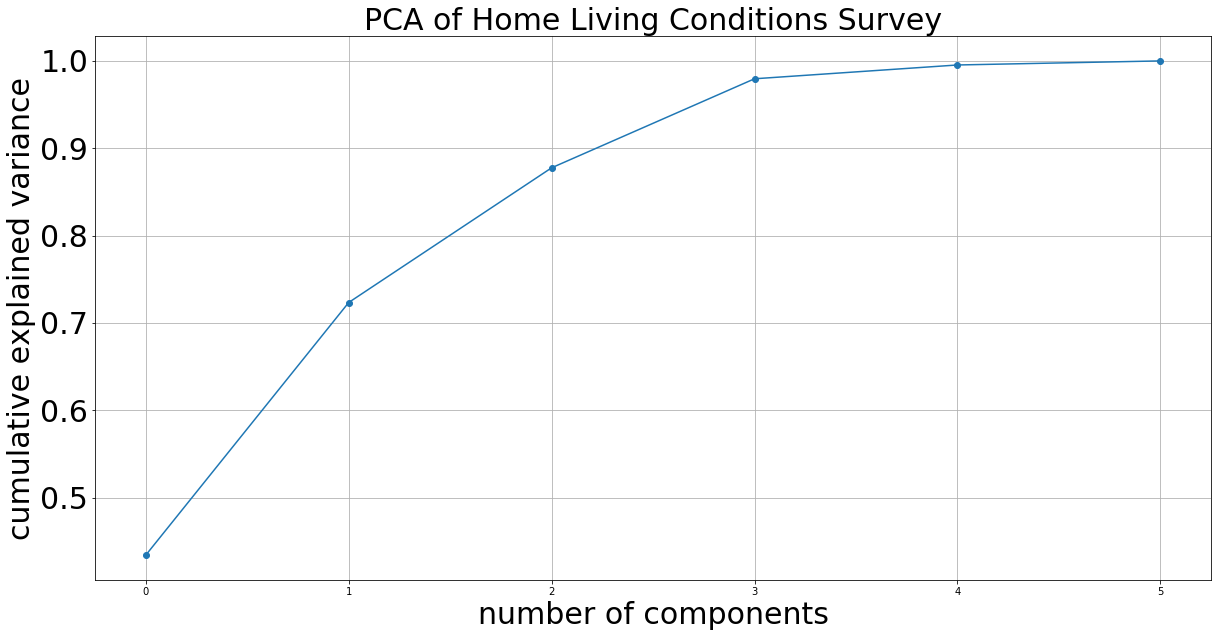

In [349]:
plt.figure(figsize = (20,10))
pca = sklearnPCA().fit(X_std)
plt.title("PCA of Home Living Conditions Survey",size =30)
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker = 'o')
#plt.hist(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components',size =30)
plt.ylabel('cumulative explained variance',size = 30)
#plt.xticks(range(0,9),list(df)[:10] , rotation = 'vertical' , size =20)
plt.yticks(size = 30)
plt.grid()
plt.show()

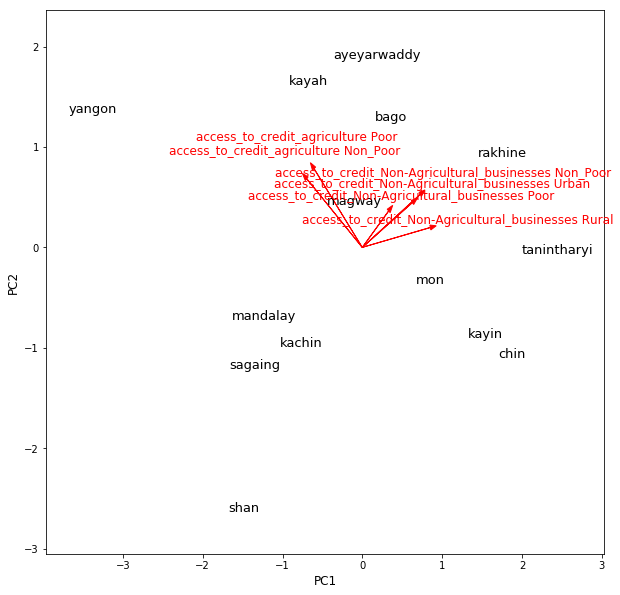

In [446]:
#!/usr/bin/env python2.7
# -*- coding: utf-8 -*-
"""Biplot example using pcasvd from statsmodels and matplotlib.
This is an example of how a biplot (like that in R) can be produced
using pcasvd and matplotlib. Additionally, this example does k-means
clustering and color observations by which cluster they belong to.
"""
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.cluster.vq import kmeans, vq
from statsmodels.sandbox.tools.tools_pca import pcasvd


def biplot(plt, pca, labels=None, colors=None,
           xpc=1, ypc=2, scale=1):
    """Generate biplot from the result of pcasvd of statsmodels.
    Parameters
    ----------
    plt : object
        An existing pyplot module reference.
    pca : tuple
        The result from statsmodels.sandbox.tools.tools_pca.pcasvd.
    labels : array_like, optional
        Labels for each observation.
    colors : array_like, optional
        Colors for each observation.
    xpc, ypc : int, optional
        The principal component number for x- and y-axis. Defaults to
        (xpc, ypc) = (1, 2).
    scale : float
        The variables are scaled by lambda ** scale, where lambda =
        singular value = sqrt(eigenvalue), and the observations are
        scaled by lambda ** (1 - scale). Must be in [0, 1].
    Returns
    -------
    None.
    """
    xpc, ypc = (xpc - 1, ypc - 1)
    xreduced, factors, evals, evecs = pca
    singvals = np.sqrt(evals)

    # data
    xs = factors[:, xpc] * singvals[xpc]**(1. - scale)
    ys = factors[:, ypc] * singvals[ypc]**(1. - scale)

    #if labels is not None:
    for i, (t, x, y) in enumerate(zip(labels, xs, ys)):
        c = 'k' if colors is None else colors[i]
        plt.text(x, y, t, ha='center', va='center',size = 13)
        xmin, xmax = xs.min(), xs.max()
        ymin, ymax = ys.min(), ys.max()
        xpad = (xmax - xmin) * 0.1
        ypad = (ymax - ymin) * 0.1
        plt.xlim(xmin - xpad, xmax + xpad)
        plt.ylim(ymin - ypad, ymax + ypad)
    #else:
#     plt.annotate(labels, xy=(x, y), xytext=(0, 0), textcoords='offset points' , size = 20)
#     colors = 'k' if colors is None else colors
#     plt.scatter(xs, ys, c=colors, marker='.')

#     # variables
    tvars = np.dot(np.eye(factors.shape[0], factors.shape[1]),
                   evecs) * singvals**scale

#     print factors.shape
#     print singvals.reshape(14,1)
#     print scale.shape
#     print evecs.shape
    #print xreduced.columns.values
#     print xpc
#     print ypc
    
    tvars = np.dot(np.eye(factors.shape[0], factors.shape[1]),
                   evecs) * singvals**scale

    for i, col in enumerate(xreduced.columns.values):
        x, y = tvars[i][xpc], tvars[i][ypc]
        plt.arrow(0, 0, x, y, color='r',
                  width=0.002, head_width=0.05)
        plt.text(x* 1.4, y * 1.4, col, color='r', ha='center', va='center' , size = 12)

    plt.xlabel('PC{}'.format(xpc + 1), size = 12)
    plt.ylabel('PC{}'.format(ypc + 1), size = 12)

def main():
    """Run a PCA on state.x77 from R and generate its biplot. Color
    observations by k-means clustering."""
    df = pd.read_csv('Household_living_conditions.csv')
    columns = list(df)[1:7]
    data = df[columns]
    data = (data - data.mean()) / data.std()
    pca = pcasvd(data, keepdim=0, demean=False)
    values = data.values
    centroids, _ = kmeans(values,3)
    idx, _ = vq(values, centroids)

#     idx, _ = vq(values, centroids)

    colors = ['gby'[i] for i in idx]

    plt.figure(figsize = (10,10))
    biplot(plt, pca, labels=df['Region'], colors=colors,
           xpc=1, ypc=2)
    plt.show()


if __name__ == '__main__':
    main()


In [450]:
credit = df[list(df)[:7]]
credit['mean']= credit.mean(axis = 1)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [451]:
credit_sorted = credit.sort(['mean'],ascending = False)
credit_sorted[['Region','mean']]

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,Region,mean
4,kayah,30.966667
0,ayeyarwaddy,28.050000
12,yangon,27.933333
1,bago,22.950000
8,rakhine,21.366667
6,magway,21.250000
13,mandalay,17.500000
7,mon,16.766667
5,kayin,15.983333
3,kachin,14.666667


In [455]:
electricity = df[['Region']+list(df)[7:11]]
electricity['mean']= electricity.mean(axis = 1)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [456]:
electricity_sorted = electricity.sort(['mean'],ascending = False)
electricity_sorted[['Region','mean']]

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,Region,mean
12,yangon,73.400
7,mon,72.575
4,kayah,71.275
10,shan,66.050
11,tanintharyi,56.600
2,chin,55.225
5,kayin,54.375
9,sagaing,54.375
3,kachin,53.250
13,mandalay,53.100


In [480]:
roof = df[['Region']+list(df)[15:17]]
roof['mean']= roof.mean(axis = 1)
roof_sorted = roof.sort(['mean'],ascending = False)
roof_sorted[['Region','mean']]

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


,Region,mean
2,chin,80.45
10,shan,75.20
12,yangon,73.45
5,kayin,69.85
4,kayah,62.50
7,mon,52.05
3,kachin,51.95
13,mandalay,50.90
9,sagaing,35.85
1,bago,35.45


In [470]:
top_credit = set(credit_sorted['Region'][:8])
bottom_electricity = set(electricity_sorted['Region'][6:])

In [471]:
top_credit.intersection(bottom_electricity)

{'ayeyarwaddy', 'bago', 'magway', 'mandalay', 'rakhine'}

In [267]:
# http://okomestudio.net/biboroku/?p=2292